In [197]:
import numpy as np
import matplotlib.pyplot as plt

import sympy

In [ ]:
class StaticSystem:
    L: any

    F1: any
    F2: any

    n1: any
    n2: any

    m2: any

    points_pos: any
    points_name: any

    def __init__(self, title, start, stop):
        self.title = title
        self.L = np.linspace(stop, start, 1000)
        self.F1 = np.zeros_like(self.L, dtype=np.float64)
        self.F2 = np.zeros_like(self.L, dtype=np.float64)
        self.n1 = np.zeros_like(self.L, dtype=np.float64)
        self.n2 = np.zeros_like(self.L, dtype=np.float64)
        self.m2 = np.zeros_like(self.L, dtype=np.float64)
        self.points_pos = []
        self.points_name = []

    def addLateralForceVector(self, position, force):
        self.F2[np.argmax(self.L <= position)] = force

    def addLateralForceArea(self, start, stop, force):
        self.F1[(self.L >= start) & (self.L <= stop)] += force

    def addNormalForceVector(self, position, force):
        self.n2[np.argmax(self.L <= position)] = force

    def addNormalForceArea(self, start, stop, force):
        self.n1[(self.L >= start) & (self.L <= stop)] += force

    def addMoment(self, position, moment):
        self.m2[np.argmax(self.L <= position)] = moment

    def getQ(self):
        return np.cumsum(self.F1) * abs(self.L[1] - self.L[0]) + np.cumsum(self.F2)

    def getN(self):
        return np.cumsum(self.n1) * abs(self.L[1] - self.L[0]) + np.cumsum(self.n2)

    def getM(self):
        Q = self.getQ()
        return np.cumsum(Q) * abs(self.L[1] - self.L[0]) + np.cumsum(self.m2)

    def getPoint(self, array, position):
        return array[np.argmax(self.L <= position)]


    def addPoint(self, name, position):
        self.points_pos.append(position)
        self.points_name.append(name)

    def print_point(self, point, name):
        print(f"{name}_N = {self.getPoint(self.getN()/1000, point):0.3f}kN, {name}_Q = {self.getPoint(self.getQ()/1000, point):0.3f}kN, {name}_M = {self.getPoint(self.getM()/1000, point):0.3f}kNm")


    def plot(self):
        plt.figure(figsize=(10, 12))

        plt.subplot(5, 1, 1)
        plt.title(self.title)

        plt.plot(self.L, self.F1/1000, "--g")
        plt.fill_between(self.L, self.F1/1000, color='green', alpha=0.1)
        plt.plot(self.L, self.F2/1000, "g")
        plt.ylabel("F [N/m or N]")

        plt.subplot(5, 1, 2)
        plt.plot(self.L, self.getQ()/1000, "g")
        plt.fill_between(self.L, self.getQ()/1000, color='green', alpha=0.1)
        plt.ylabel("Q [N]")

        plt.subplot(5, 1, 3)
        plt.plot(self.L, self.getM()/1000, "g")
        plt.fill_between(self.L, self.getM()/1000, color='green', alpha=0.1)
        plt.ylabel("M [Nm]")

        # normalkräfte
        plt.subplot(5, 1, 4)
        plt.plot(self.L, self.n1/1000, "--b")
        plt.fill_between(self.L, self.n1/1000, color='b', alpha=0.1)
        plt.plot(self.L, self.n2/1000, "b")
        plt.ylabel("n [N/m or N]")

        plt.subplot(5, 1, 5)
        plt.plot(self.L, self.getN()/1000, "b")
        plt.fill_between(self.L, self.getN()/1000, color='b', alpha=0.1)
        plt.ylabel("N [N]")

        plt.xticks(ticks=self.points_pos, labels=self.points_name)

        plt.xlabel("L [m]")
        plt.show()

        for name, pos in zip(self.points_name, self.points_pos):
            self.print_point(pos, name)

In [199]:
# constants
g = 10

# lengths
l_ab = 1.25
l_bc = 1.25
l_de = 1.75
l_ef = 1.5
l_fg = 0.25
l_gh = 0.25

# masses of arms per meter
m_ab = 100
m_bc = 100
m_de = 50
m_ef = 50

# masses of electronics
m_d = 200
m_e = 200
m_f = 100
m_h = 100

# points
A = 0
B = A + l_ab
C = B + l_bc
D = C
E = D + l_de
F = E + l_ef
G = F + l_fg
H = G + l_gh

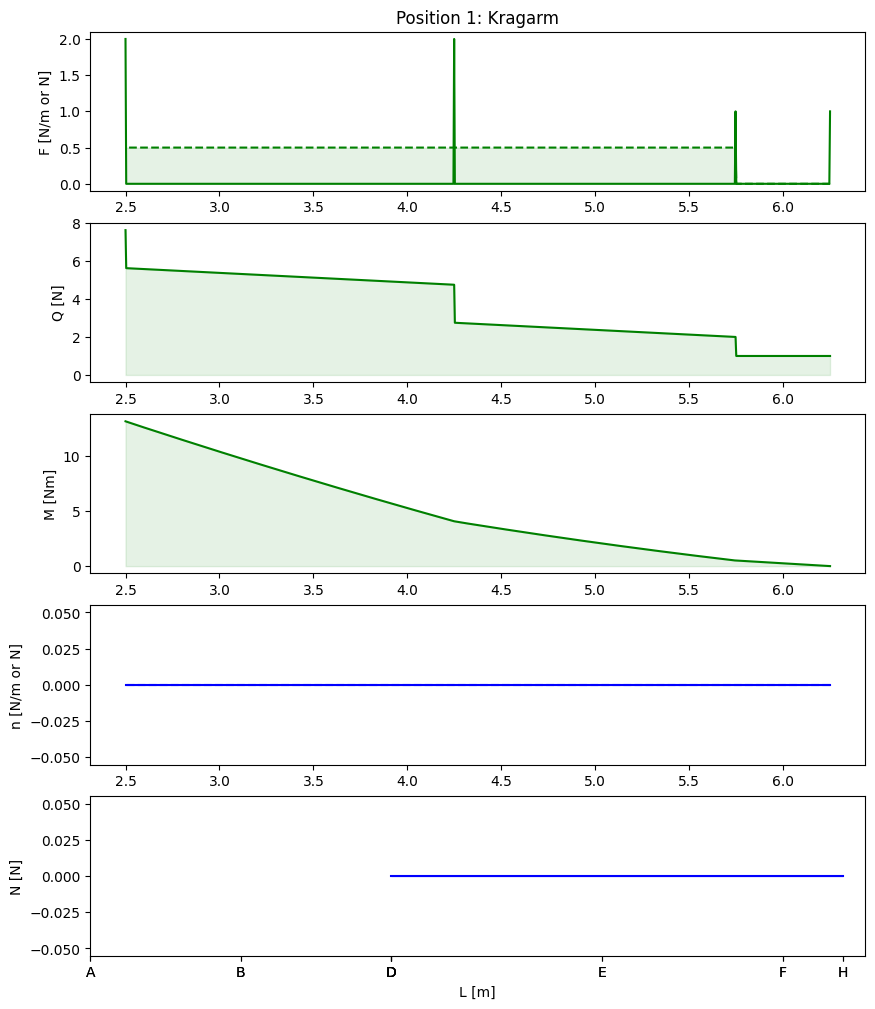

D_N = 0.000kN, D_Q = 7.625kN, D_M = 13.163kNm
E_N = 0.000kN, E_Q = 4.751kN, E_M = 4.079kNm
F_N = 0.000kN, F_Q = 2.002kN, F_M = 0.511kNm
H_N = 0.000kN, H_Q = 1.000kN, H_M = 0.004kNm
A_N = 0.000kN, A_Q = 1.000kN, A_M = 0.004kNm
B_N = 0.000kN, B_Q = 1.000kN, B_M = 0.004kNm
C_N = 0.000kN, C_Q = 7.625kN, C_M = 13.163kNm
A_N = 0.000kN, A_Q = 1.000kN, A_M = 0.004kNm
B_N = 0.000kN, B_Q = 1.000kN, B_M = 0.004kNm
C_N = 0.000kN, C_Q = 7.625kN, C_M = 13.163kNm
D_N = 0.000kN, D_Q = 7.625kN, D_M = 13.163kNm
E_N = 0.000kN, E_Q = 4.751kN, E_M = 4.079kNm
F_N = 0.000kN, F_Q = 2.002kN, F_M = 0.511kNm
H_N = 0.000kN, H_Q = 1.000kN, H_M = 0.004kNm


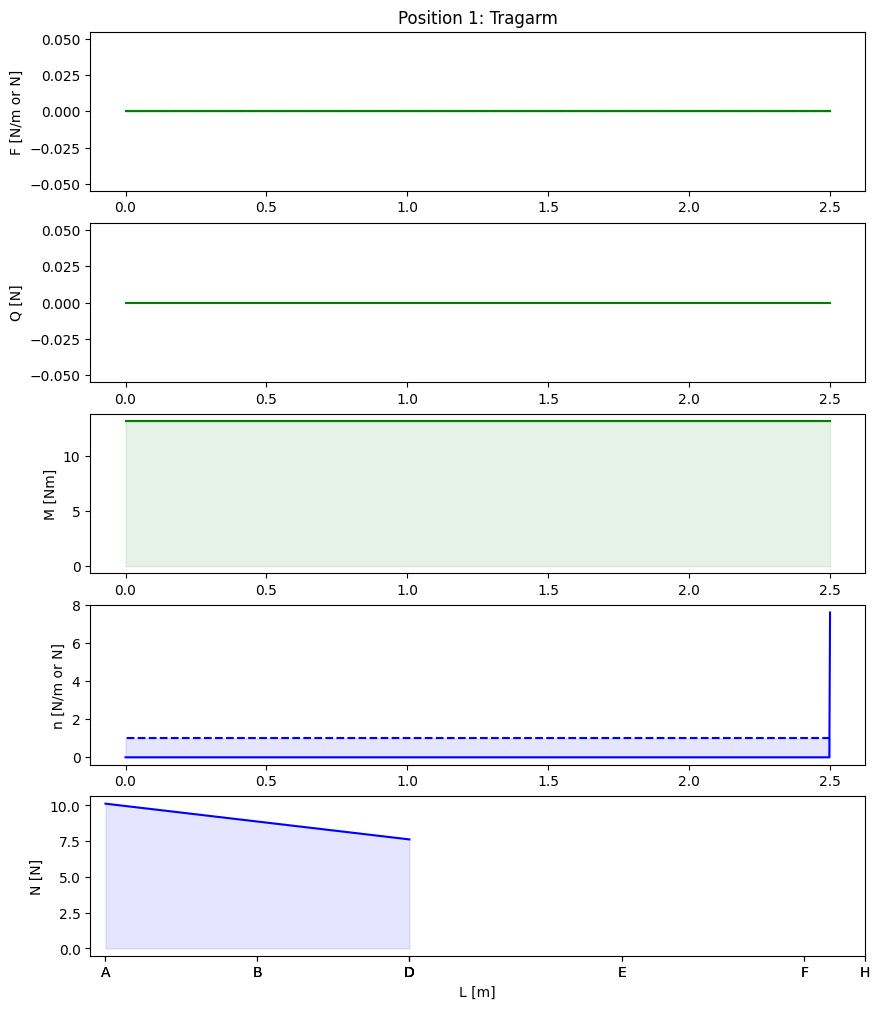

D_N = 7.628kN, D_Q = 0.000kN, D_M = 13.163kNm
E_N = 7.628kN, E_Q = 0.000kN, E_M = 13.163kNm
F_N = 7.628kN, F_Q = 0.000kN, F_M = 13.163kNm
H_N = 7.628kN, H_Q = 0.000kN, H_M = 13.163kNm
A_N = 10.128kN, A_Q = 0.000kN, A_M = 13.163kNm
B_N = 8.879kN, B_Q = 0.000kN, B_M = 13.163kNm
C_N = 7.628kN, C_Q = 0.000kN, C_M = 13.163kNm
A_N = 10.128kN, A_Q = 0.000kN, A_M = 13.163kNm
B_N = 8.879kN, B_Q = 0.000kN, B_M = 13.163kNm
C_N = 7.628kN, C_Q = 0.000kN, C_M = 13.163kNm
D_N = 7.628kN, D_Q = 0.000kN, D_M = 13.163kNm
E_N = 7.628kN, E_Q = 0.000kN, E_M = 13.163kNm
F_N = 7.628kN, F_Q = 0.000kN, F_M = 13.163kNm
H_N = 7.628kN, H_Q = 0.000kN, H_M = 13.163kNm


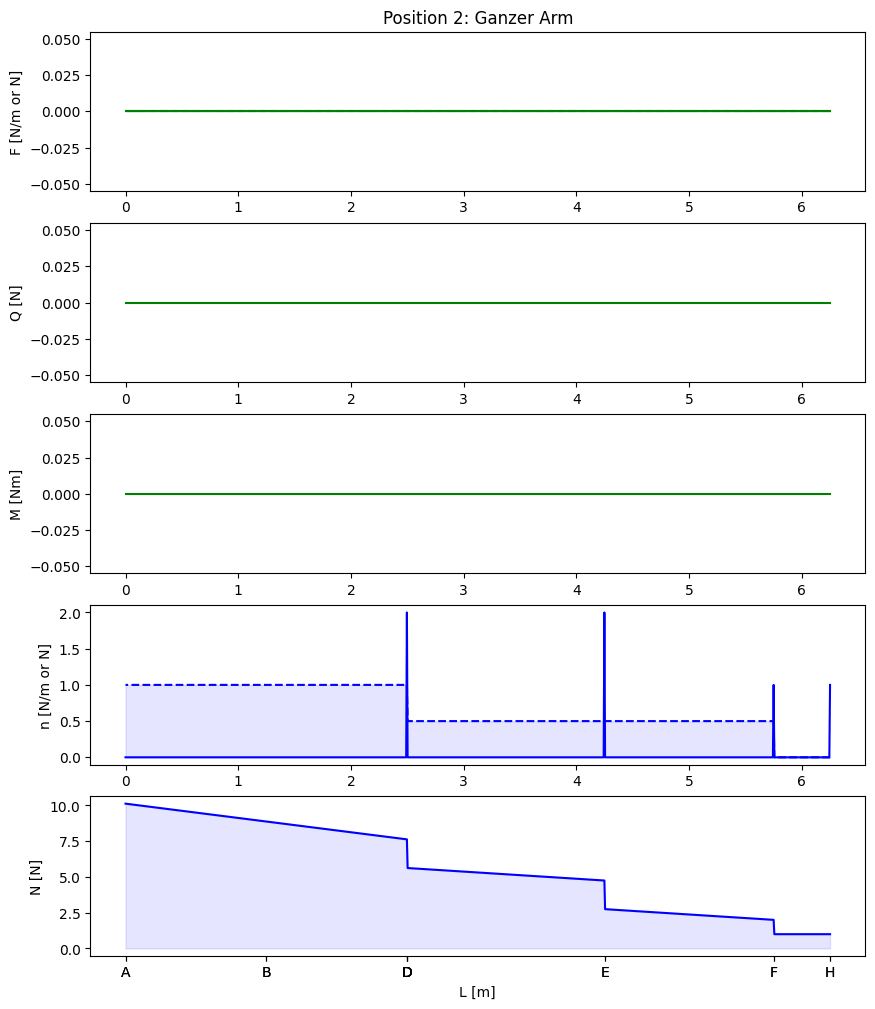

D_N = 7.633kN, D_Q = 0.000kN, D_M = 0.000kNm
E_N = 4.754kN, E_Q = 0.000kN, E_M = 0.000kNm
F_N = 2.003kN, F_Q = 0.000kN, F_M = 0.000kNm
H_N = 1.000kN, H_Q = 0.000kN, H_M = 0.000kNm
A_N = 10.129kN, A_Q = 0.000kN, A_M = 0.000kNm
B_N = 8.884kN, B_Q = 0.000kN, B_M = 0.000kNm
C_N = 7.633kN, C_Q = 0.000kN, C_M = 0.000kNm
A_N = 10.129kN, A_Q = 0.000kN, A_M = 0.000kNm
B_N = 8.884kN, B_Q = 0.000kN, B_M = 0.000kNm
C_N = 7.633kN, C_Q = 0.000kN, C_M = 0.000kNm
D_N = 7.633kN, D_Q = 0.000kN, D_M = 0.000kNm
E_N = 4.754kN, E_Q = 0.000kN, E_M = 0.000kNm
F_N = 2.003kN, F_Q = 0.000kN, F_M = 0.000kNm
H_N = 1.000kN, H_Q = 0.000kN, H_M = 0.000kNm


In [200]:
s1 = StaticSystem("Position 1: Kragarm", D, H)
s1.addLateralForceVector(D, m_d * g)
s1.addLateralForceVector(E, m_e * g)
s1.addLateralForceVector(F, m_f * g)
s1.addLateralForceVector(H, m_h * g)
s1.addLateralForceArea(D, E, m_de * g)
s1.addLateralForceArea(E, F, m_ef * g)

s1.addPoint("D", D)
s1.addPoint("E", E)
s1.addPoint("F", F)
s1.addPoint("H", H)

s2 = StaticSystem("Position 1: Tragarm", A, C)
s2.addMoment(C, s1.getPoint(s1.getM(), D))
s2.addNormalForceVector(D, s1.getPoint(s1.getQ(), D))
s2.addNormalForceArea(A, B, m_ab * g)
s2.addNormalForceArea(B, C, m_bc * g)

s2.addPoint("A", A)
s2.addPoint("B", B)
s2.addPoint("C", C)

s3 = StaticSystem("Position 2: Ganzer Arm", A, H)
s3.addNormalForceVector(D, m_d * g)
s3.addNormalForceVector(E, m_e * g)
s3.addNormalForceVector(F, m_f * g)
s3.addNormalForceVector(H, m_h * g)

s3.addNormalForceArea(A, B, m_ab * g)
s3.addNormalForceArea(B, C, m_bc * g)
s3.addNormalForceArea(D, E, m_de * g)
s3.addNormalForceArea(E, F, m_ef * g)

s3.addPoint("A", A)
s3.addPoint("B", B)
s3.addPoint("C", C)
s3.addPoint("D", D)
s3.addPoint("E", E)
s3.addPoint("F", F)
s3.addPoint("H", H)

s1.plot()
s2.plot()
s3.plot()